In [1]:
import torch
import segmentation_models_pytorch as smp
from torch import nn
from src.conf.config import CONFIG
from src.dl.inferer import Inferer
from src.dl.lightning_model import SegModel

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
model = smp.Unet(
    encoder_name="resnext50_32x4d", 
    classes=2
)

# model = smp.FPN(
#     encoder_name="resnext50_32x4d",
#     classes=2,
#     decoder_merge_policy='cat'
# )

config = CONFIG
lightning_model = SegModel.from_conf(model, config)
ckpt = lightning_model.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
lightning_model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(lightning_model, config)

In [4]:
infobj = inf.run()

Prediction for: test_1


/home/leos/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.



Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [5]:
# inf.plot_histograms()

In [6]:
# inf.plot_predictions()

In [5]:
inf.post_process()

In [8]:
# inf.plot_segmentations()

In [6]:
score_df = inf.benchmark(save=True)
score_df

,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_Sensitivity,inst_Precision,splits,merges
test_1_metrics,0.313782,0.319813,0.501852,0.293561,0.630383,0.465686,0.329480,0.793872,0.188853,1.800522
test_10_metrics,0.446872,0.453954,0.558088,0.428537,0.662849,0.646508,0.531361,0.825368,0.329069,1.377542
test_11_metrics,0.352294,0.388265,0.494370,0.253925,0.620194,0.409428,0.282266,0.745098,0.345507,1.720082
test_12_metrics,0.479221,0.491580,0.682532,0.420624,0.683022,0.615827,0.500000,0.801498,0.174941,0.861995
test_13_metrics,0.383710,0.390259,0.667926,0.384341,0.638057,0.602362,0.450331,0.909361,0.250839,2.109292
test_14_metrics,0.564458,0.569606,0.685530,0.530323,0.704375,0.752899,0.758993,0.746903,0.590226,0.883879
test_2_metrics,0.252100,0.252868,0.508612,0.203533,0.609079,0.334165,0.273469,0.429487,0.105845,0.990238
test_3_metrics,0.418278,0.433719,0.512040,0.374744,0.637597,0.587744,0.535533,0.651235,0.297974,1.317349
test_4_metrics,0.465500,0.479227,0.529251,0.380845,0.674198,0.564885,0.531100,0.603261,0.390479,1.286838
test_5_metrics,0.353151,0.363047,0.566646,0.356890,0.669534,0.533043,0.403297,0.785867,0.244581,2.131831


In [7]:
score_df.loc["averages_for_the_set"]

AJI                 0.388167
AJI_plus            0.397256
DICE2               0.563525
PQ                  0.349260
SQ                  0.643564
DQ                  0.539110
inst_Sensitivity    0.443416
inst_Precision      0.728402
splits              0.261319
merges              1.301195
Name: averages_for_the_set, dtype: float64

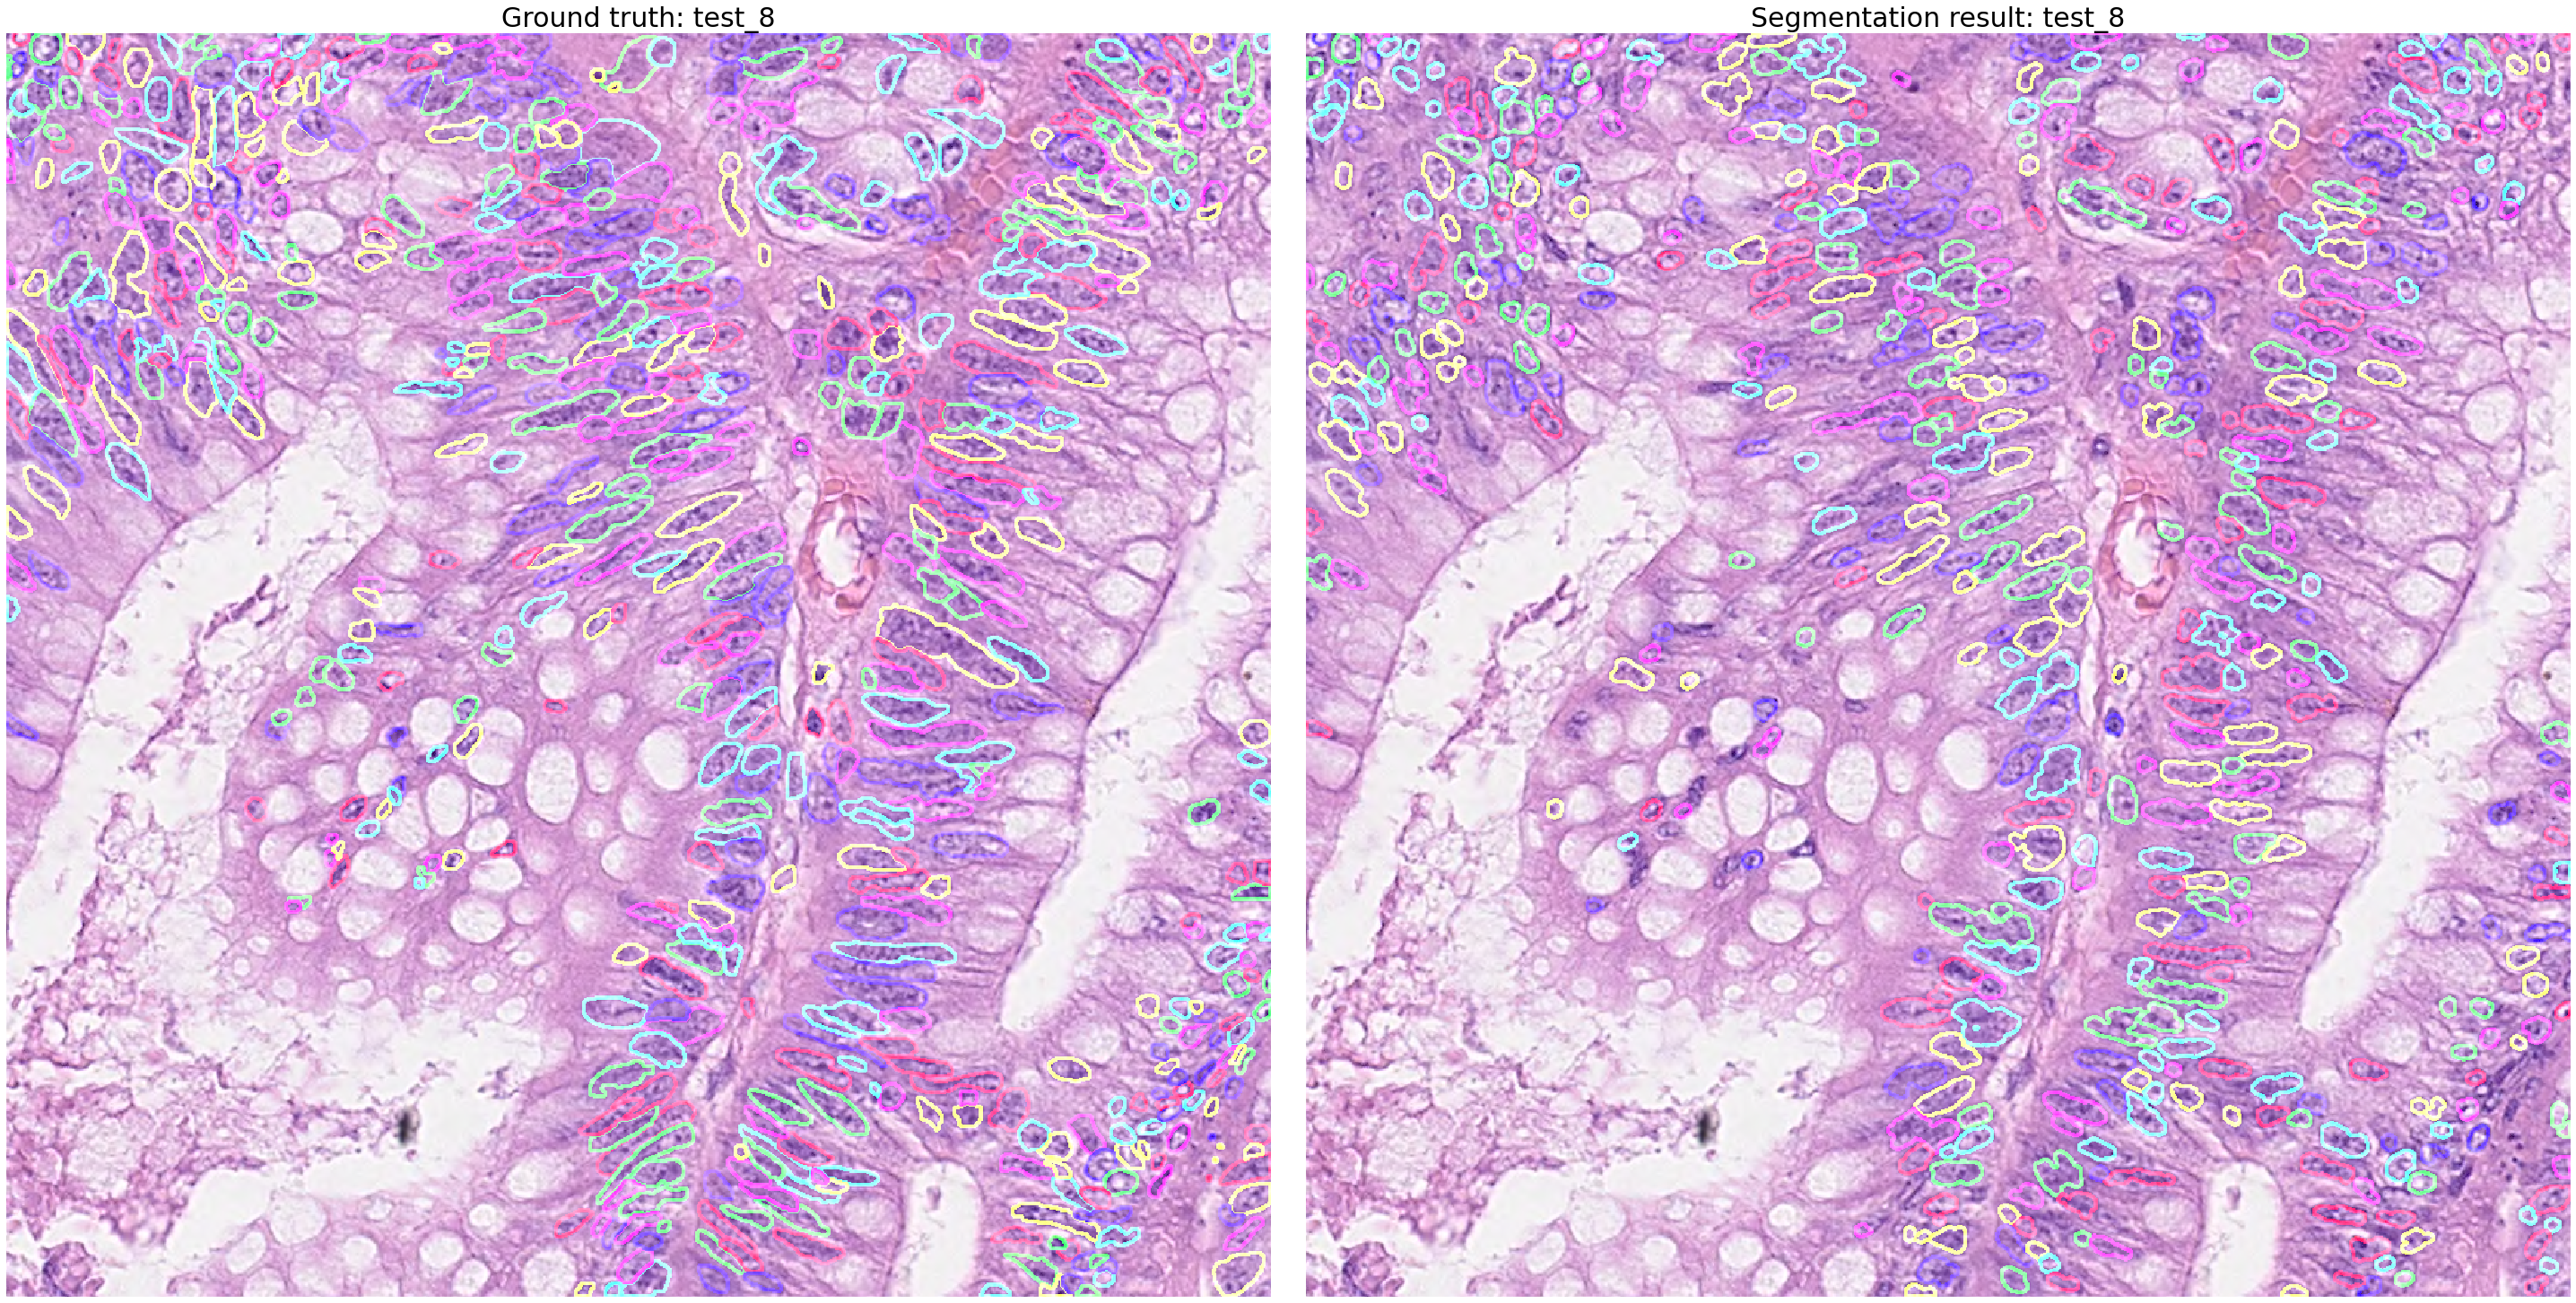

In [8]:
inf.plot_overlays(ixs=[12], save=False)